# ML Assigntent 2, Group 5.

### Overview

**Assignment Topic**: Neural Network Models for Object Recognition

**Assignment Brief**: Nowadays, Artificial Intelligence (AI) artefacts are powering various industries and sectors globally. Many AI products, like self-driving cars, for example, utilise object detection. The ability to build intelligent products that can detect objects is a valuable skill. Some other interesting applications of object detection include: Face detection (in the new iPhone), object tracking, people counting, pedestrian detection, video surveillance etc.

In this task, you are required to build one Neural Networks using the CIFAR-10 - Object Recognition image dataset.

**Sourse**: 

CIFAR-10 

https://www.kaggle.com/competitions/cifar-10/data

or

keras-datasets

https://keras.io/api/datasets/cifar10/


**Context**:
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.


### Metadata:

10 classes:

'Airplane' - label 0, 

'Automobile' - label 1, 

'Bird' - label 2, 

'Cat' - label 3, 

'Deer' - label 4, 

'Dog' - label 5,  

'Frog' - label 6, 

'Horse' - label 7, 

'Ship' - label 8, 

'Truck' - label 9. 


### Task: 

Your overall task is to build the neural networks and evaluate the performance of the model. You are expected to create a validation set from the training set. Hence you would have:

* A Training set
* A Validation set
* A Testing set

Your ML model should address following points:

* Describe how you created your validation set from your training set and give details of the data (metadata).
* Discuss the rationale for having a validation set.
* Discuss the structures of the ANN.
* Discuss the activation function used.
* Discuss the loss function used.
* Give an account of the number of epochs used in the models.
* Discuss your approach to aspects of the Neural Network design.
* Include a concluding section, discussing the knowledge gained during the entire exercise.

# [Part 1: Import Libraries, Load Data](#Part-1:-Import-Libraries,-Load-Data.)
* ### Import 
* ### Load dataset

# [Part 2: Data Preprocessing](#Part-2:-Data-Preprocessing.)
* ### Exploration of dataset shape
* ### Visualisation of an image in three separate channels
* ### Visualisation of classes
* ### Data Augmentation
* ### Data Representation
* ### Data Normalisation
* ### Splitting the dataset
* ### Encoding labels into one-hot vectors
* ### Print metadata


# [Part 3: ANN Development Process](#Part-3:-ANN-Development-Process.)
* ### Model architecture
* ### Model summary
* ### Model training and evaluation
* ### Visulisation of test predictions
* ### Classification report
* ### Confusion Matrix
* ### Misclassification plot
* ### Save predictions into .csv file (version 1)
* ### Save predictions into .csv file (version 2)
* ### Additional discussion
* ### References

# Part 1: Import Libraries, Load Data.

* ### Import 

In [67]:
#pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

* ### Load dataset

In [68]:
# load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Part 2: Data Preprocessing.

* ### Exploration of dataset shape

In [69]:
print('Shape of training data and labels are - ',x_train.shape,y_train.shape)
print('Shape of test data and labels are - ',x_test.shape,y_test.shape)

Shape of training data and labels are -  (50000, 32, 32, 3) (50000, 1)
Shape of test data and labels are -  (10000, 32, 32, 3) (10000, 1)


* ### Visualisation of an image in three separate channels

In [70]:
def show_channels(img):
    # display the original image
    # show the image without tick marks on the axes
    plt.imshow(img)
    plt.title('Original image')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    # extract the red, green, and blue color channels from the image
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    
    # create subplots to display the color channels
    # set the figure size to 12x6
    fig, ax = plt.subplots(1, 3, figsize=(12, 6))
    
    # display the red channel in the first subplot
    ax[0].imshow(red_channel, cmap='Reds')
    ax[0].set_title('Red Channel')
    
    # display the green channel in the second subplot
    ax[1].imshow(green_channel, cmap='Greens')
    ax[1].set_title('Green Channel')
    
    # display the blue channel in the third subplot
    ax[2].imshow(blue_channel, cmap='Blues')
    ax[2].set_title('Blue Channel')
    
    # remove tick marks on the x and y axes for all subplots
    for i in range(3):
        ax[i].set_xticks([])
        ax[i].set_yticks([])

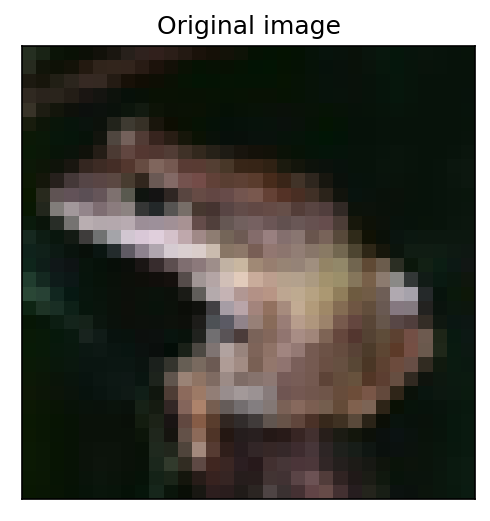

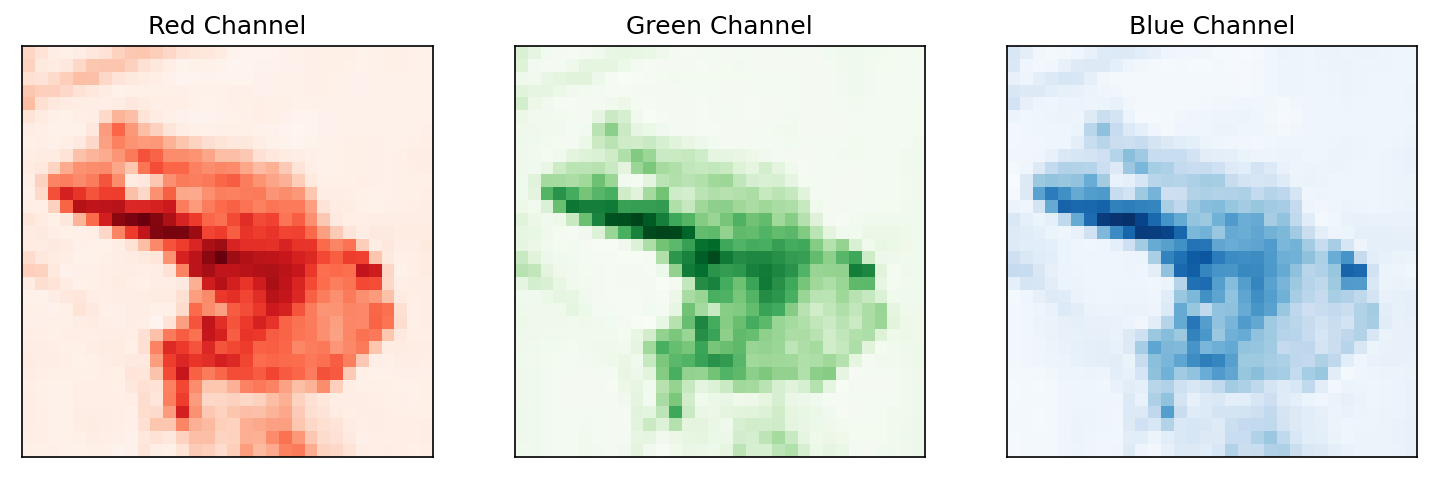

In [71]:
# generate a random index
idx = np.random.randint(50000)

# display the channels of the randomly selected training image
show_channels(x_train[idx])

* ### Visualisation of classes

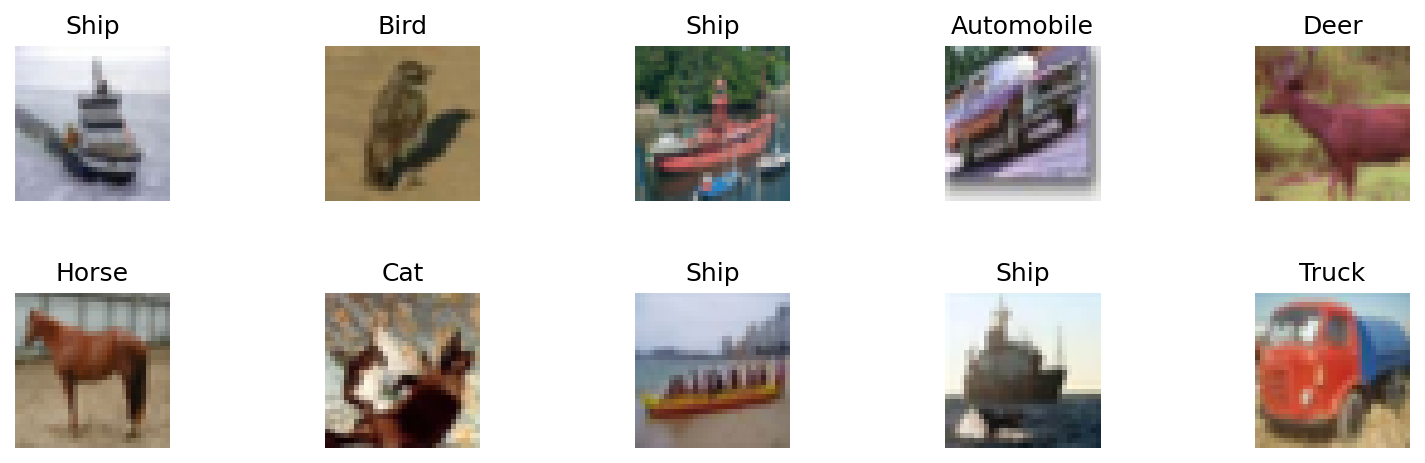

In [72]:
# define the list of classes
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# randomly select 10 indices from the range of 50000
sample = np.random.choice(np.arange(50000), 10)

# create a figure with 2 rows and 5 columns of subplots
fig, axes = plt.subplots(2, 5, figsize=(12, 4))
axes = axes.ravel()

# loop through the selected indices
for i in range(10):
    # get the current index
    idx = sample[i]
    
    # display the image at the current index
    axes[i].imshow(x_train[idx])
    
    # set the title of the subplot as the corresponding class label
    axes[i].set_title(classes[y_train[idx][0]])
    
    # turn off the axis labels for the subplot
    axes[i].axis('off')
    
# adjust the spacing between the subplots
plt.subplots_adjust(wspace=1)

* ### Data Augmentation

In [73]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,                # randomly rotate images within the range of -15 to +15 degrees
    horizontal_flip=True,             # randomly flip images horizontally
    width_shift_range=0.1,            # randomly shift the width of images by 0.1 times the total width
    height_shift_range=0.1,           # randomly shift the height of images by 0.1 times the total height
    #zoom_range=0.3                   # uncomment to enable random zooming of images
)

datagen.fit(x_train)                  # apply data augmentation to the training data
datagen.fit(x_test)                   # apply data augmentation to the test data

* ### Data Representation

In [74]:
# flatten the images
num_pixels = np.prod(x_train.shape[1:])  # calculate the total number of pixels
x_train_flat = x_train.reshape(x_train.shape[0], num_pixels)
x_test_flat = x_test.reshape(x_test.shape[0], num_pixels)

# verify the shape of the flattened feature vectors
print(f"Flattened training images shape: {x_train_flat.shape}")
print(f"Flattened testing images shape: {x_test_flat.shape}")

Flattened training images shape: (50000, 3072)
Flattened testing images shape: (10000, 3072)


* ### Data Normalisation

In [75]:
# normalize the data
x_train = x_train.astype('float32') / 255.0    # scale the pixel values to the range [0, 1]
x_test = x_test.astype('float32') / 255.0      # scale the pixel values to the range [0, 1]

mean = np.mean(x_train)                        # compute the mean value of the training data
std = np.std(x_train)                          # compute the standard deviation of the training data

x_test = (x_test - mean) / std                 # standardize the test data using the mean and standard deviation
x_train = (x_train - mean) / std               # standardize the training data using the mean and standard deviation

* ### Splitting the dataset

In [76]:
# split the dataset into training, validation, and testing sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

* ### Encoding labels into one-hot vectors

In [77]:
# convert labels to one-hot vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

* ### Print metadata 

In [78]:
# print metadata 
num_train_samples = x_train.shape[0]
num_val_samples = x_val.shape[0]
num_test_samples = x_test.shape[0]
image_shape = x_train.shape[1:]
print(f"Number of training samples: {num_train_samples}")
print(f"Number of validation samples: {num_val_samples}")
print(f"Number of testing samples: {num_test_samples}")
print(f"Image shape: {image_shape}")

Number of training samples: 40000
Number of validation samples: 10000
Number of testing samples: 10000
Image shape: (32, 32, 3)


# Part 3: ANN Development Process.

* ### Model architecture

In [79]:
# define the ANN architecture
model = Sequential()

# flatten the input shape of (32, 32, 3)
model.add(Flatten(input_shape=(32, 32, 3)))

# add a dense layer with 256 units and ReLU activation
model.add(Dense(256, activation='relu'))

# add a dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# add a dense layer with the number of classes and softmax activation
model.add(Dense(num_classes, activation='softmax'))

* ### Model summary

In [80]:
# print model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 256)               786688    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


* ### Model training and evaluation

In [81]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 1.7770 - accuracy: 0.3868 - val_loss: 1.6228 - val_accuracy: 0.4283
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.5128 - accuracy: 0.4649 - val_loss: 1.5345 - val_accuracy: 0.4584
Epoch 3/10
625/625 [==============================] - 3s 4ms/step - loss: 1.4025 - accuracy: 0.5082 - val_loss: 1.5031 - val_accuracy: 0.4733
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 1.3261 - accuracy: 0.5331 - val_loss: 1.4858 - val_accuracy: 0.4895
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 1.2587 - accuracy: 0.5562 - val_loss: 1.4752 - val_accuracy: 0.4905
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 1.1998 - accuracy: 0.5768 - val_loss: 1.4676 - val_accuracy: 0.5034
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 1.1397 - accuracy: 0.5943 - val_loss: 1.5021 - val_accuracy: 0.4969
Epoch 

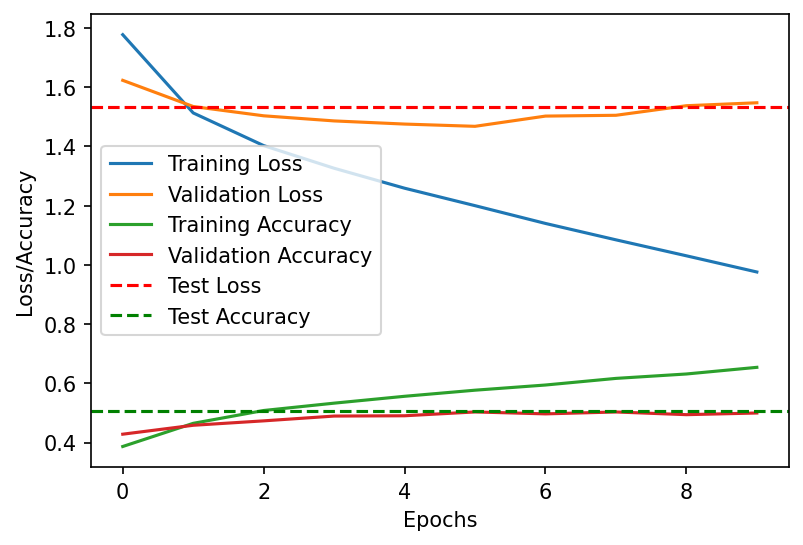

In [82]:
# train the model
batch_size = 64
epochs = 10

# train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

# evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}, {test_accuracy*100:.2f}%')

# plot training and validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# evaluate the model on the testing set
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f'Train Loss: {train_loss:.4f}')
print(f'Train Accuracy: {train_accuracy:.4f}, {train_accuracy*100:.2f}%')

# evaluate the model on the testing set
validation_loss, validation_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {validation_loss:.4f}')
print(f'Validation Accuracy: {validation_accuracy:.4f}, {validation_accuracy*100:.2f}%')

# print visualisation plot
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.axhline(y=test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

* ### Visulisation of test predictions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


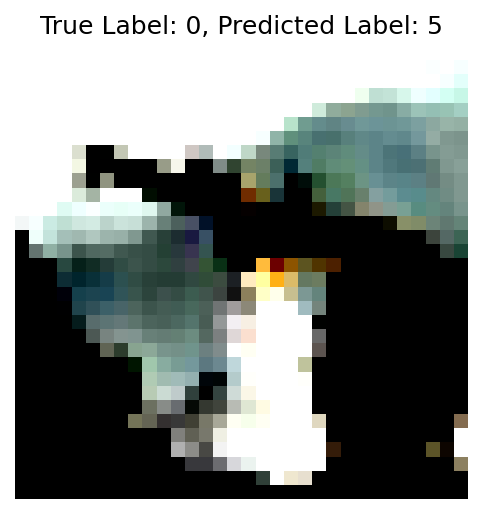

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


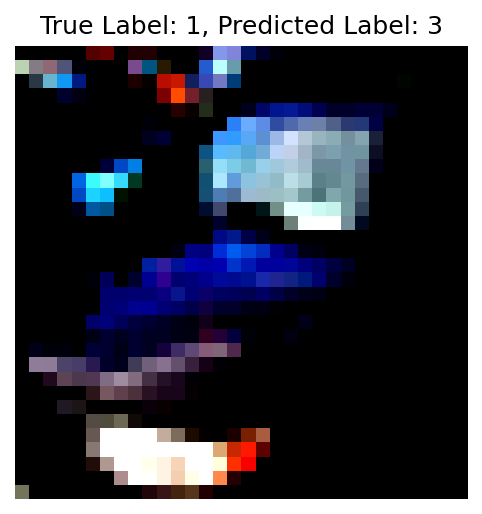

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


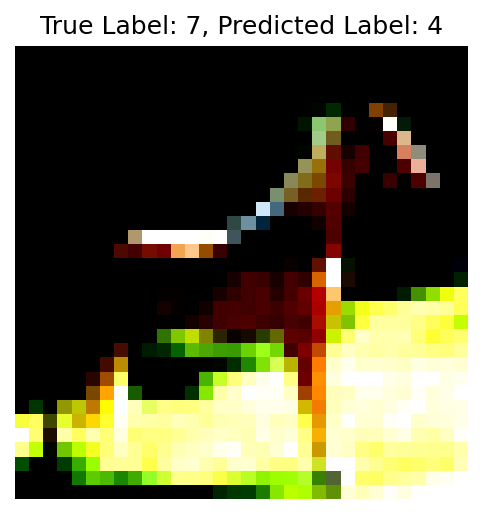

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


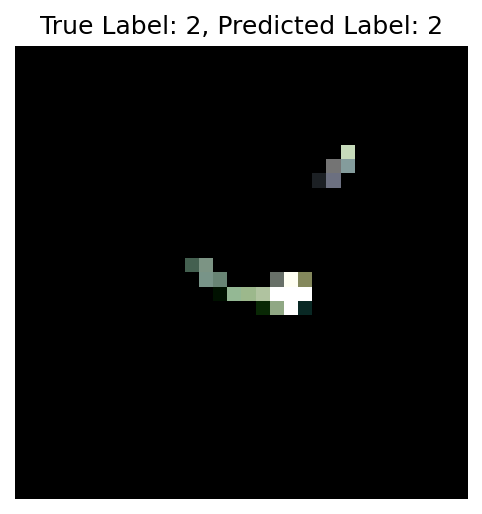

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


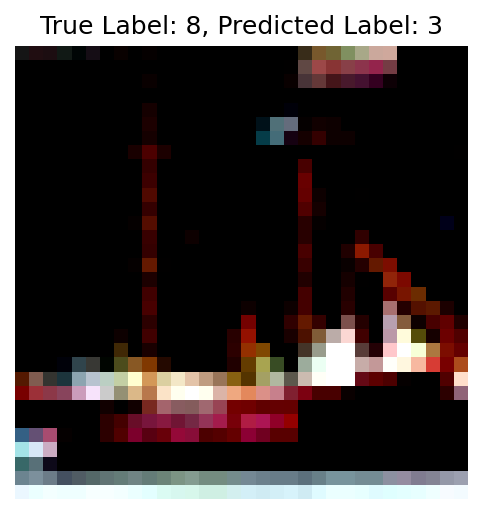

In [83]:
# make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# visualise test images and predictions
num_samples = 5  # number of test samples to visualise
random_indices = np.random.choice(range(len(x_test)), size=num_samples, replace=False)

for index in random_indices:
    image = x_test[index]
    true_label = np.argmax(y_test[index])
    predicted_label = y_pred_classes[index]

    plt.imshow(image)
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

* ### Classification report

In [84]:
# classification report
classification_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.63      0.58      1000
           1       0.62      0.58      0.60      1000
           2       0.44      0.35      0.39      1000
           3       0.36      0.28      0.31      1000
           4       0.40      0.46      0.43      1000
           5       0.44      0.41      0.43      1000
           6       0.52      0.63      0.57      1000
           7       0.60      0.54      0.57      1000
           8       0.63      0.63      0.63      1000
           9       0.50      0.56      0.53      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.51      0.50     10000



* ### Confusion matrix

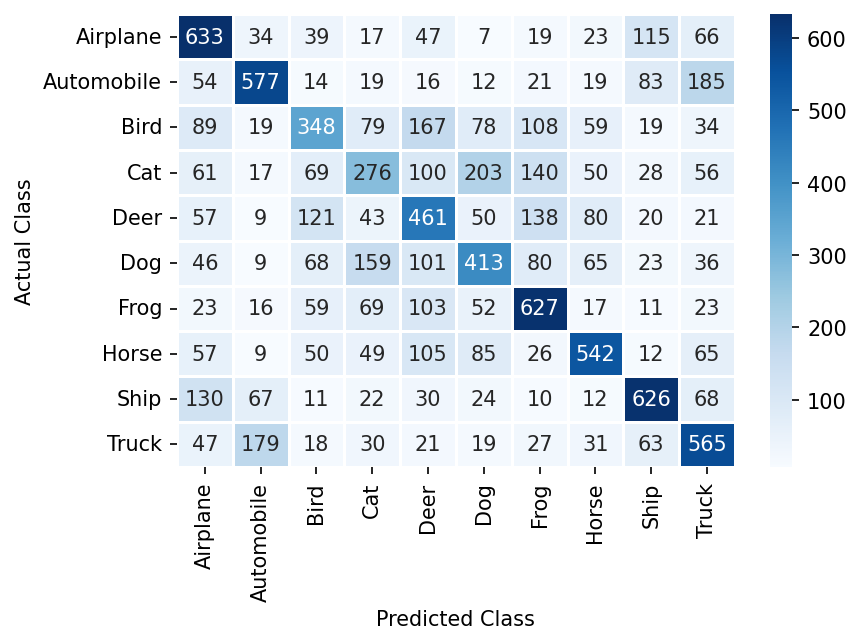

In [85]:
# confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

#plt.figure(figsize=(8, 8))  # Set the figure size

# plot confusion matrix
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues', linewidths=0.5, annot_kws={'size': 10})
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.show()

* ### Misclassification plot

<Figure size 2250x1200 with 0 Axes>

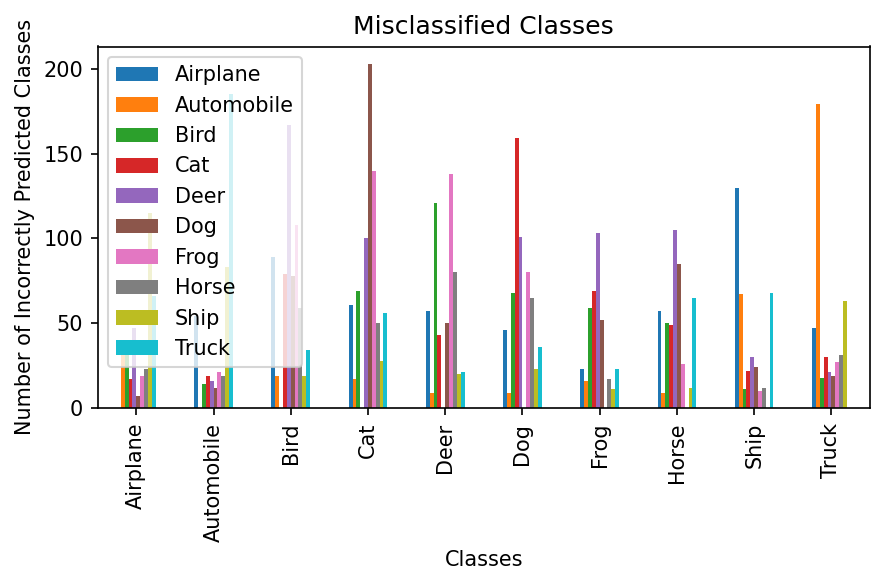

In [86]:
# misclassification plot
plt.figure(figsize=(15, 8))  

for label in df_cm.columns:
    df_cm.at[label, label] = 0

plt.rcParams['figure.dpi'] = 150  
ax = df_cm.plot(kind="bar", title="Misclassified Classes")
ax.set_xlabel("Classes")
ax.set_ylabel("Number of Incorrectly Predicted Classes")
plt.tight_layout()  

* ### Save predictions into .csv file (version 1)

This is a simple predictions.csv file with 'id' and 'label' (digit) columns only.

In [87]:
def save_predictions_to_csv(predictions, save_path):
    # create a DataFrame with 'id' and 'label' columns
    df = pd.DataFrame({'id': np.arange(len(predictions)), 'label': predictions})

    # save the DataFrame to a CSV file
    df.to_csv(save_path, index=False)
    print(f"Predictions saved to {save_path}.")

# make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# save the predictions to a CSV file
save_predictions_to_csv(y_pred_classes, "predictions.csv")

Predictions saved to predictions.csv.


* ### Save predictions into .csv file (version 2)

This is the predictions_1.csv file with additional columns:
* 'id' representing the unique identifier.
* 'label' indicating the assigned label corresponding to a specific class.
* 'predicted class' denoting the class predicted for each instance in the test dataset.
* 'real class' representing the original class for each instance in the test dataset.
* 'prediction status' indicating whether the predicted class is correct or incorrect. It displays 'correct' if the predicted class matches the real class, and 'incorrect' if the predicted class differs from the real class.

In [88]:
def save_predictions_to_csv(predictions, true_classes, save_path):
    # create a DataFrame with 'id', 'label', 'class', 'real class', and 'prediction status' columns
    class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    df = pd.DataFrame({'id': np.arange(len(predictions)),
                       'label': predictions,
                       'predicted class': [class_labels[label] for label in predictions],
                       'real class': [class_labels[true_label] for true_label in true_classes]})

    # add 'prediction' column
    df['prediction status'] = np.where(df['predicted class'] == df['real class'], 'correct', 'incorrect')

    # save the DataFrame to a CSV file
    df.to_csv(save_path, index=False)
    print(f"Predictions saved to {save_path}.")

# make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# save the predictions to a CSV file
save_predictions_to_csv(y_pred_classes, y_true_classes, "predictions_1.csv")

Predictions saved to predictions_1.csv.


* ### Additional discussion

**1. Describe how you created your validation set from your training set and give details of the data (metadata).**

**and**

**2. Discuss the rationale for having a validation set.**

When developing and evaluating a model, it is crucial to use a train-validation-test split. The training set teaches the model patterns and makes predictions, while the validation set assesses the model's performance and guides hyperparameter tuning. Finally, the testing set evaluates the model's final performance on unseen data. This code allocated 20% of the training data to the independent validation set. The test_size parameter was set to 0.2 to determine the proportion of the validation set, and the random_state parameter was set to 42 to ensure reproducibility. This ensured that the same split was obtained each time the code was executed, allowing for consistent evaluation and comparison of different models or configurations.

During model training, it is essential to have an independent dataset that the model has not encountered before. This separation of data into a training set and a validation set allows us to evaluate how well the model generalises to new, unseen examples. By assessing the model's performance on the validation set, we can gain insights into its ability to accurately classify images beyond the training data. The validation set serves as a reliable measure of the model's performance and helps us detect potential issues such as overfitting or underfitting. The validation set plays a crucial role in guiding the process of hyperparameter tuning and can determine the optimal settings that result in the best performance. 

In summary, the rationale for having a validation set in the image classification task is threefold: 1) to evaluate the model's ability to generalise unseen data, 2) to guide the process of hyperparameter tuning, and 3) to monitor the model's progress during training.


**3. Discuss the structures of the ANN.**

**and**

**7. Discuss your approach to aspects of the Neural Network design.**

The ANN model we developed followed a basic feedforward structure and utilised Keras's Sequential class for linear layer stacking. To transform the input images into a 1-dimensional array, we started with a Flatten layer with the specified input shape of (32, 32, 3), indicating images of 32x32 pixels with 3 RGB colour channels. Then, we added two dense hidden layers with 256 and 128 units, respectively, activated by the rectified linear unit (ReLU) activation function to introduce non-linearity and extract relevant features from the input data.

The number of units in the hidden layers of the neural network (256 and 128) was selected based on factors like the complexity of the problem, available computational resources, and experimentation. Choosing 256 and 128 units is  the result of trying different values and finding a balance between model complexity and performance. More units allow the model to learn complex patterns from the data, but too many units can increase computational requirements and the risk of overfitting. With 256 and 128 units, the model can extract important features from the input data while keeping the complexity manageable. This enables the model to capture both detailed and higher-level characteristics of the images.

The final layer was a Dense layer with num_classes units, where num_classes represented the number of classes (10) in the problem. The output layer used the softmax activation function, providing probability predictions for each class based on the learned features. Our model aimed to learn and classify images into the ten predefined classes of the dataset. We chose ReLU for activation functions in the hidden layers because it applied a thresholding operation, set negative values to zero, and left positive values unchanged. It introduced non-linearity to the model, enabling it to learn complex patterns and mitigate the vanishing gradient problem while remaining computationally efficient.

We analysed the summary of the model. The model consisted of three main layers: "flatten," "dense," and "dense_1." The "flatten" layer converted the input images into a 1D array with 3,072 elements. The "dense" layer had 786,688 parameters, the "dense_1" layer had 32,896 parameters, and the "dense_2" layer (output layer) had 1,290 parameters. The total number of trainable parameters was 820,874. There were no non-trainable parameters. The output also included a visual representation of the model architecture.


**4. Discuss the activation function used.**

**and**

**5. Discuss the loss function used.**

**and**

**6. Give an account of the number of epochs used in the models.**

To train and evaluate our model, we compiled it using the adam optimizer, categorical_crossentropy loss function, and accuracy as the performance metric.

The loss function used for training the model was categorical cross-entropy, which is often employed for multi-class classification problems. The optimization algorithm utilised to train the model was not specified. The evaluation metric used to measure the performance of the model during training and validation was "accuracy," which calculated the proportion of correctly classified images among all the images in the training and validation sets.

The model was trained for 10 epochs with a batch size of 64 using the fit function. The batch size determined how many samples were processed at once before updating the weights, while the number of epochs specified how many times the entire dataset was trained. The selected number of epochs and batches was optimal for this model. An increase in the number of epochs during the experiment did not lead to a noticeable increase in the accuracy of the model.
During training, the loss and accuracy values were printed for each epoch.

**8. Include a concluding section, discussing the knowledge gained during the entire exercise.**

**Conclusion.**
 
Through this assignment, our team gained valuable knowledge and practical experience in designing and training neural networks for image classification tasks. We learned about the importance of data preprocessing, including data exploration and visualisation techniques. We developed an understanding of data augmentation and its role in improving model performance and preventing overfitting.

We delved into the process of designing the neural network architecture, including selecting appropriate activation functions and layer configurations. We compiled and trained the model using the Adam optimizer and the categorical cross-entropy loss function. Monitoring the training process, we observed the changes in loss and accuracy metrics over multiple epochs.

The evaluation of the trained model provided insights into its performance. We examined classification reports, which provided precision, recall, and F1-score metrics for each class. The confusion matrix and associated visualisations allowed us to analyse the accuracy of predictions and identify areas of improvement. We also gained an understanding of the significance of hyperparameter tuning in optimising model performance.

This assignment provided us with hands-on experience in working with real-world datasets, preprocessing techniques, neural network architecture design, model compilation and training, evaluation metrics, and result interpretation. It enhanced our knowledge and skills in the field of neural networks and equipped us with valuable insights for future machine learning projects.


* ### References

Kerras, (2020) The Sequential model. Available from: https://keras.io/guides/sequential_model/ [Accessed 10 July 2023].

Kerras, (2020) Flatten layer. Available from: https://keras.io/api/layers/reshaping_layers/flatten/ [Accessed 10 July 2023].

Kerras, (2020) Dense layer. Available from: https://keras.io/api/layers/core_layers/dense/ [Accessed 10 July 2023].

Kerras, (2020) Softmax function. Available from: https://keras.io/api/layers/activations/#softmax-function [Accessed 10 July 2023].

Kerras, (2020) Relu function. Available from: https://keras.io/api/layers/activations/#relu-function [Accessed 10 July 2023].

Kerras, (2020) CategoricalCrossentropy class. Available from: https://keras.io/api/metrics/probabilistic_metrics/#categoricalcrossentropy-class [Accessed 10 July 2023].

Kerras, (2020) CategoricalCrossentropy class. Available from: https://keras.io/api/optimizers/adam/ [Accessed 10 July 2023].

Kerras, (2020) Adam. Available from: https://keras.io/api/optimizers/adam/ [Accessed 10 July 2023].

Krizhevsky, A., (2009) Learning Multiple Layers of Features from Tiny Images. Available from: https://www.cs.toronto.edu/~kriz/cifar.html [Accessed 10 July 2023].